# <center>Voter model on multiple graphs

In [1]:
# imports
import sys
import numpy as np
import pickle
from time import time
from scipy.stats import norm
from scipy.linalg import expm
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.lines import Line2D
import networkx as nx
import util # our functions

# confidence intervals
quant = norm().ppf(0.95)

# for plots appearance
color = ["blue", "red", "green", "orange"]
color_alpha = ["lavender", "mistyrose", "lightgreen", "moccasin"] # to do fill_btw without transparency in order to use eps instead of pdf
letter = "abcdefghijklmnopqrstuvwxyz"
marker = "x+*^p"
linestyle = ["--", "-.", ":", "-", (0,(3, 5, 1, 5))] # last one is dashdotdotted from https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html

# latex rendering
rc('font',**{'family':'sans-serif','sans-serif':['Palatino']})
rc('text', usetex=True)
rc('legend', frameon=False) # PS doesn't do well with transparencies

## New version

Parameters.

In [7]:
n = 100
z0, z1 = 20, 40
n_simu = 500
max_time = 200
spacing_simu = .1
length = int(np.floor(max_time/spacing_simu)+1)
x_axis = np.linspace(0, max_time, length)
graph_model = ("ER","WS","BA")
model_name = {"ER":"Erdös-Rényi", "WS":"Watts-Strogatz", "BA":"Barabási-Albert"}
graph_param = {"ER":(.1,.3,.5,1), "BA":(1,3,5), "WS":(0.01,.05,0.1)}
n_param = {model: len(graph_param[model]) for model in graph_model}
param_name = {"ER":"p", "BA":r"m", "WS":r"$\omega$"}

Compute coalesce cv time and limiting opinion.

In [3]:
#cv_time = util.coalesce_cvtime(n,z0+z1)
n1_equilibrium = n*z1/(z0+z1)

Simulate using custom function from `util.py`for random models.

In [66]:
N1t = {model: np.zeros((n_simu, length, n_param[model])) for model in graph_model}
start = time()

for model in graph_model:
     for i,param in enumerate(graph_param[model]):
        leaders = util.create_connected_user_graph(n,model,param)
        for k in range(n_simu): #progressbar.progressbar(range(n_simu)):
            n1 = np.random.randint(z1,n-z0+1)
            sys.stdout.flush()
            sys.stdout.write("Graph {}. Param {}/{}. Simu {}/{}. Elapsed time {:.3f}\r".format(model, i+1, n_param[model], k+1, n_simu, time()-start))
            N1t[model][k,:,i] = util.custom_graph_simu(leaders, n1, z1, z0, max_time, spacing_simu)

KeyboardInterrupt: 

Save/load N1t.

In [5]:
#pickle.dump(N1t, open("results/voter_multiple_graphs/N1t_multiple_params.p", "wb"))
#for model in graph_model:
    #pickle.dump(N1t[model], open("results/voter_multiple_graphs/N1t_{}.p".format(model), "wb"))
N1t = pickle.load(open("results/voter_multiple_graphs/N1t_multiple_params.p", "rb"))

Plot average N1t empirical and expected limiting opinion. Show cv time as well.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


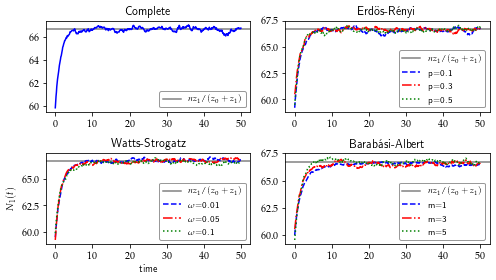

In [57]:
# choose custom time range
max_time_plot = 50
time_range = x_axis<=max_time_plot

fig, ax = plt.subplots(2, 2, figsize=(7,4))

# complete first
mean = N1t["ER"][:,time_range,-1].mean(axis=0)
ax[0,0].axhline(y=n1_equilibrium, color="grey", label=r"$nz_1/(z_0+z_1)$")
ax[0,0].plot(x_axis[time_range], mean, c=color[0])
ax[0,0].set_title("Complete")
ax[0,0].legend(loc="best", frameon=True, fontsize=9, edgecolor="grey")

# then the rest
for j,model in enumerate(graph_model,1):
    x,y = j//2,j%2 # axis index
    ax[x,y].axhline(y=n1_equilibrium, color="grey", label=r"$nz_1/(z_0+z_1)$")
    for i,param in enumerate(graph_param[model]):
        if model=="ER" and param==1: # we already plotted complete
            continue
        else:
            mean = N1t[model][:,time_range,i].mean(axis=0)
            ax[x,y].plot(x_axis[time_range], mean, ls=linestyle[i], c=color[i], label=r"{}={}".format(param_name[model],param))

    # style
    ax[x,y].legend(loc="best", frameon=True, fontsize=9, edgecolor="grey")
    ax[x,y].set_title(model_name[model])
        

# style, show and save
ax[1,0].set_xlabel(r"time")
ax[1,0].set_ylabel(r"$N_1(t)$")
plt.tight_layout()
plt.savefig("results/voter_multiple_graphs/N1t_multiple_models.eps")
plt.show()
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


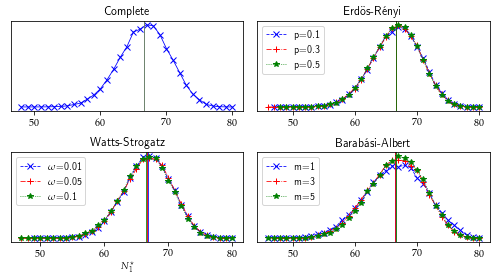

In [53]:
Q = util.Qmatrix(n,z0,z1)
stationary = util.stationary(n,z0,z1,Q)
cv_time = 20
time_range = x_axis>=cv_time

fig, ax = plt.subplots(2, 2, figsize=(7,4))

# complete first
unique, count = np.unique(N1t["ER"][:,time_range,-1], return_counts=True)
distrib = count/count.sum() # transform counts into proportions
ax[0,0].plot(unique, distrib, lw=.8, marker=marker[0], color=color[0])
ax[0,0].axvline(x=N1t["ER"][:,time_range,-1].mean(), lw=.8,  color=color[i])
ax[0,0].axvline(x=n1_equilibrium, lw=.8, color="grey")
ax[0,0].set_title("Complete")
ax[0,0].set_yticks([])

for j,model in enumerate(graph_model,1):
    x,y = j//2,j%2 # axis index
    #ax[x,y].plot(range(z1, n-z0+1), stationary, color="grey", lw=.8, label=r"$nz_1/(z_0+z_1)$")
    ax[x,y].axvline(x=n1_equilibrium, lw=.8, color="grey")
    for i,param in enumerate(graph_param[model]):
        if model=="ER" and param==1:
            continue
        else:
            unique, count = np.unique(N1t[model][:,time_range,i], return_counts=True)
            distrib = count/count.sum() # transform counts into proportions
            ax[x,y].plot(unique, distrib, linewidth=.8, ls=linestyle[i], marker=marker[i], color=color[i], label=r"{}={}".format(param_name[model],param))
            ax[x,y].axvline(x=N1t[model][:,time_range,i].mean(), lw=.8, color=color[i])
    
    ax[x,y].set_title(model_name[model])
    ax[x,y].legend(loc="upper left", frameon=True)
    ax[x,y].set_yticks([])
    
# end
ax[1,0].set_xlabel(r"$N_1^\star$")
plt.tight_layout()
plt.savefig("results/voter_multiple_graphs/multigraphs_distrib_equilibrium.eps")
plt.show()
plt.close()

Look at averaged relative errors.

In [9]:
cv_time = 20
time_range = x_axis>=cv_time
for model in graph_model:
    for i,param in enumerate(graph_param[model]):
        temporal_mean = N1t[model][:,time_range,i].mean(axis=1)
        error = np.abs(temporal_mean - n1_equilibrium)/n1_equilibrium
        error_avg = error.mean()
        std_avg = error.std()
        print("[{} {}]".format(model,param), error_avg, std_avg)

[ER 0.1] 0.016569172681843426 0.012061991415097251
[ER 0.3] 0.010177584675180458 0.007405198526638848
[ER 0.5] 0.008671998889505837 0.0062833123225803445
[ER 1] 0.007689999999999996 0.005793926135232083
[WS 0.01] 0.024723187118267622 0.019464976616374433
[WS 0.05] 0.026314664075513597 0.019431025346996623
[WS 0.1] 0.024196823986674075 0.019082710368561635
[BA 1] 0.04672472515269296 0.03483747645230945
[BA 3] 0.033335824541921154 0.02367338720357106
[BA 5] 0.028171521377012773 0.021310038503569235


Look at averaged absolute errors.

In [10]:
cv_time = 20
time_range = x_axis>=cv_time
for model in graph_model:
    for i,param in enumerate(graph_param[model]):
        temporal_mean = N1t[model][:,time_range,i].mean(axis=1)
        error = np.abs(temporal_mean - n1_equilibrium)
        error_avg = error.mean()
        std_avg = error.std()
        print("[{} {}]".format(model,param), error_avg, std_avg)

[ER 0.1] 1.104611512122895 0.8041327610064835
[ER 0.3] 0.6785056450120305 0.49367990177592325
[ER 0.5] 0.5781332593003892 0.418887488172023
[ER 1] 0.5126666666666665 0.3862617423488055
[WS 0.01] 1.6482124745511748 1.2976651077582957
[WS 0.05] 1.7543109383675732 1.295401689799775
[WS 0.1] 1.613121599111605 1.2721806912374425
[BA 1] 3.114981676846197 2.322498430153964
[BA 3] 2.2223883027947435 1.578225813571404
[BA 5] 1.8781014251341852 1.4206692335712823


## Old version

Parameters.

In [32]:
n = 100
z0, z1 = 20, 30
n_simu = 100
max_time = 50
spacing_simu = 2
length = int(np.floor(max_time/spacing_simu)+1)
x_axis = np.linspace(0, max_time, length)
graph_model = ("ER","BA","WS")

Compute coalesce cv time and limiting opinion.

In [33]:
cv_time = util.coalesce_cvtime(n,z0+z1)
n1_equilibrium = n*z1/(z0+z1)

Choose graph models.

In [34]:
w = .1 # ER parameter
m = 3 # BA parameter
k_ws, p = int(n/10), .1 # WS parameters
def create_connected_user_graph(model):
    connected = False # restart if we don't get a connected graph
    while not connected:
        if model=="ER":
            G = nx.erdos_renyi_graph(n,w)
        elif model == "BA":
            G = nx.barabasi_albert_graph(n,m)
        elif model == "WS":
            G = nx.watts_strogatz_graph(n,k_ws,p)
        else: 
            print("incompatible graph model: {}".format(model))
            return None
        connected = nx.is_connected(G)
    return {i: np.array(list(G.neighbors(i))) for i in range(n)} # return a leader dict

Simulate using custom function from `util.py`.

In [35]:
N1t = {model: np.zeros((n_simu, length)) for model in graph_model}
start = time()

for model in graph_model:
    if model != "complete": 
        leaders = create_connected_user_graph(model)
    for k in range(n_simu):#progressbar.progressbar(range(n_simu)):
        n1 = np.random.randint(z1,n-z0+1)
        sys.stdout.flush()
        sys.stdout.write("Graph {}. Simu {}/{}. Elapsed time {:.3f}\r".format(model, k+1, n_simu, time()-start))
        if model == "complete": 
            N1t["complete"][k,:] = util.simulator(n, n1, z1, z0, max_time, spacing_simu)
        else:
            N1t[model][k,:] = util.custom_graph_simu(leaders, n1, z1, z0, max_time, spacing_simu)

Save/load N1t.

In [36]:
#pickle.dump(N1t, open("results/voter_multiple_graphs/N1t.p", "wb"))
#N1t = pickle.load(open("results/voter_multiple_graphs/N1t.p", "rb"))

Plot average N1t empirical and expected limiting opinion. Show cv time as well.

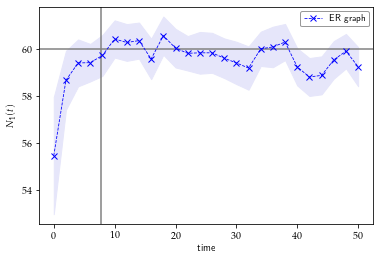

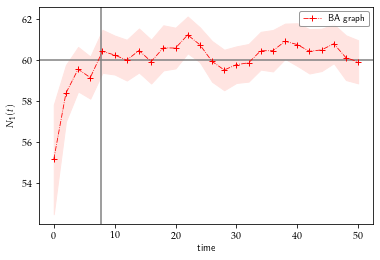

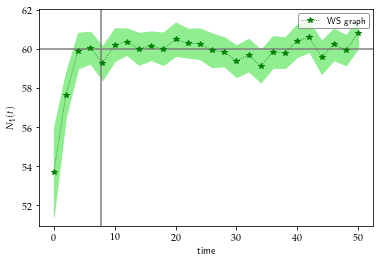

In [37]:
for i,model in enumerate(graph_model):
    # plot cv time and limiting opinion
    plt.axvline(x=cv_time, color="grey")
    plt.axhline(y=n1_equilibrium, color="grey")

    # plot N1t
    mean = N1t[model].mean(axis=0)
    std = N1t[model].std(axis=0,ddof=1)
    plt.fill_between(x_axis, mean-quant*std/np.sqrt(n_simu), mean+quant*std/np.sqrt(n_simu), color=color_alpha[i])
    plt.plot(x_axis, mean, ls=linestyle[i], lw=.8, c=color[i], marker=marker[i], label=model+" graph")

    # style
    plt.legend(loc="best", frameon=True, fontsize=9, edgecolor="grey")
    plt.xlabel(r"time")
    plt.ylabel(r"$N_1(t)$")

    # show and save
    #plt.tight_layout()
    #plt.savefig("results/voter_multiple_graphs/N1t_multiple_models.eps".format(n, n_simu, max_time), bbox_inches="tight")
    plt.show()
    plt.close()

Plot error (absolute and relative) between average N1t empirical and expected limiting opinion. Show cv time as well.

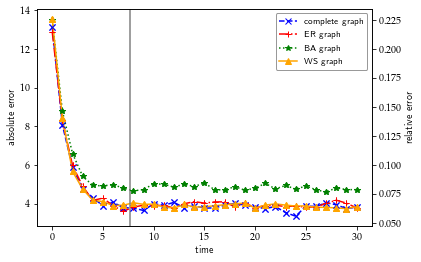

In [25]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot errors
for i,model in enumerate(graph_model):
    #mean = N1t[model].mean(axis=0)
    #error_abs = np.abs(mean-n1_equilibrium)
    #error_rel = np.abs(mean-n1_equilibrium)/n1_equilibrium
    diff = np.abs(N1t[model]-n1_equilibrium)
    error_abs = diff.mean(axis=0)
    error_rel = (diff/n1_equilibrium).mean(axis=0)
    ax1.plot(x_axis, error_abs, ls=linestyle[i], c=color[i], marker=marker[i], label=model+" graph")
    ax2.plot(x_axis, error_rel, ls=linestyle[i], lw=0, c=color[i], marker=marker[i]) 
                    # lw=0 coz we just need this to get the 2nd y-axis


# style
ax1.legend(loc="best", frameon=True, fontsize=9, edgecolor="grey")
ax1.set_xlabel(r"time")
ax1.set_ylabel(r"absolute error")
ax2.set_ylabel(r"relative error")#, rotation=270)

# plot cv time
ax1.axvline(x=cv_time, color="grey")
#ax1.annotate(r"convergence time", xy=(cv_time-.3,.03), xytext=(cv_time-8,.06),arrowprops=dict(arrowstyle="->"))

# show and save
#plt.tight_layout()
#plt.savefig("results/voter_multiple_graphs/N1t_multiple_models.eps".format(n, n_simu, max_time), bbox_inches="tight")
plt.show()
plt.close()

Average errors after cv time.

In [38]:
cv_idx = x_axis > cv_time
idx = -1
for i,model in enumerate(graph_model):
    diff = np.abs(N1t[model][:,idx]-n1_equilibrium)
    error_abs = diff.mean(axis=0)
    error_rel = diff.mean(axis=0)/n1_equilibrium
    std_abs = diff.std(axis=0,ddof=1)
    std_rel = diff.std(axis=0,ddof=1)/n1_equilibrium
    print(model, error_rel, std_rel, error_abs, std_abs)

ER 0.0685 0.05052446596506483 4.11 3.0314679579038897
BA 0.089 0.05784281498847757 5.34 3.4705688993086543
WS 0.0645 0.04340029790895287 3.87 2.6040178745371723


Plot distrib of N1t at equilibrium.

60.0 59.76045454545454


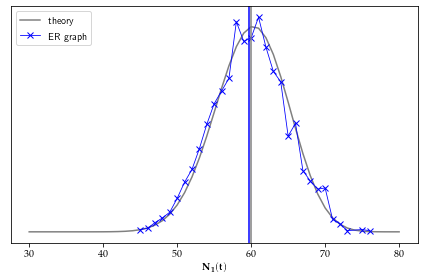

60.0 60.35136363636364


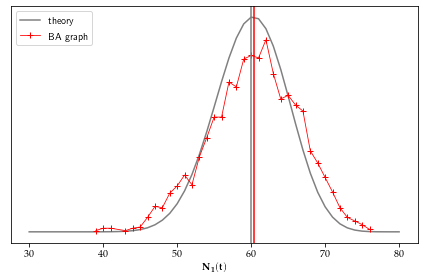

60.0 60.00727272727273


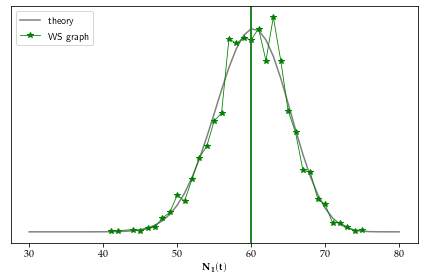

In [40]:
Q = util.Qmatrix(n,z0,z1)
stationary = util.stationary(n,z0,z1,Q)
cv_idx = x_axis > cv_time
idx = cv_idx
for i,model in enumerate(graph_model):
    plt.plot(range(z1, n-z0+1), stationary, color="grey", label=("theory"))
    unique, count = np.unique(N1t[model][:,idx], return_counts=True)
    distrib = count/count.sum() # transform counts into proportions
    plt.plot(unique, distrib, linewidth=.8, marker=marker[i], color=color[i], label=model+" graph")
    plt.axvline(x=n1_equilibrium, color="grey")
    plt.axvline(x=N1t[model][:,idx].mean(), color=color[i])
    print(n1_equilibrium, N1t[model][:,idx].mean())
    
    plt.legend(loc="upper left", frameon=True)
    plt.xlabel(r"$\mathbf{N_1(t)}$")
    plt.yticks([])
    plt.tight_layout()
    #plt.savefig("results/voter_multiple_graphs/multigraphs_distrib_equilibrium.eps")
    plt.show()
    plt.close()

## Legacy

Compute theoretical values for $\mathbb{E}N_1^{(t)}$ using Theorem 2 and also according to Ref.[19] (On the role of zealotry...) eq5.

In [35]:
expect = {"markov":np.zeros(length), "ref19":np.zeros(length)}
Q = util.Qmatrix(n,z0,z1)

z = z0+z1
for i,t in enumerate(x_axis):
    Pt = expm(t*Q)
    k_range = np.arange(z1,n-z0+1)
    expect["markov"][i] = k_range.dot(Pt[n1-z1,:])
    expect["ref19"][i] = z1 + z1*(n-z)/z + (n1-z1 - z1*(n-z)/z) * np.exp(-z/n*t) # ref19